# MNIST Baseline neural network
*Anders Poirel 02-10-2019*


Data from the [Kannada Mnist](https://www.kaggle.com/c/Kannada-MNIST) competition on Kaggle. Here, similar the original MNIST, the goal is to correctly classify handwritten digits in the Kannada script.

## Training the model

In [60]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import seaborn as sns

In [62]:
train = pd.read_csv('../data/raw/train.csv')
y_train = train['label']
X_train = train.drop('label', axis = 1)

This is the final architecture that was decided - two hidden layers is perhaps a bit overkill given how we achieve comparable test accuracy scores (0.05% less) using a NN with a single hidden layer. 

In [63]:
model = keras.Sequential()
model.add(Dense(784, input_dim = 784, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [64]:
history = model.fit(X_train, to_categorical(y_train),
                    validation_split = 0.2, epochs = 15)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 11s 230us/sample - loss: 1.4495 - acc: 0.7937 - val_loss: 0.1720 - val_acc: 0.9471
Epoch 2/15
48000/48000 [==============================] - 9s 182us/sample - loss: 0.3070 - acc: 0.9210 - val_loss: 0.0990 - val_acc: 0.9688
Epoch 3/15
48000/48000 [==============================] - 9s 188us/sample - loss: 0.2326 - acc: 0.9432 - val_loss: 0.0829 - val_acc: 0.9756
Epoch 4/15
48000/48000 [==============================] - 9s 187us/sample - loss: 0.1775 - acc: 0.9550 - val_loss: 0.0790 - val_acc: 0.9821
Epoch 5/15
48000/48000 [==============================] - 9s 188us/sample - loss: 0.1477 - acc: 0.9622 - val_loss: 0.0899 - val_acc: 0.9806
Epoch 6/15
48000/48000 [==============================] - 10s 213us/sample - loss: 0.1431 - acc: 0.9661 - val_loss: 0.0728 - val_acc: 0.9843
Epoch 7/15
48000/48000 [==============================] - 11s 222us/sample - loss: 0.1232 - acc: 0.9704 - va

### Evaluating model performance

We examine how training and validation set loss and accuracy evolve over time. 
Note: for this to display, add `validation_split = 0.2` as a parameter to `model.fit` above. 
Otherwise, we will want to remove the parameter to train the final model on the entire dataset.

In [65]:
sns.set()

In [66]:
# history is expected to be a keras History object
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    return

In [67]:
# history is expected to be a keras History object
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    return 

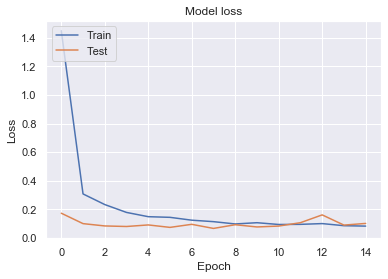

In [68]:
plot_loss(history)

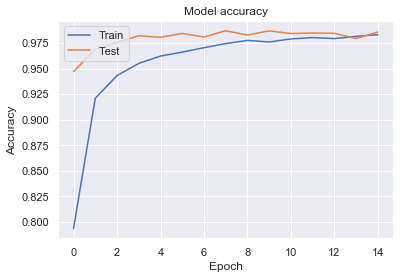

In [69]:
plot_acc(history)

## Making predictions for Kaggle

In [71]:
submission = pd.read_csv('../data/raw/sample_submission.csv')
X_test = pd.read_csv('../data/raw/test.csv')
X_test.drop('id', axis = 1, inplace = True)

In [72]:
preds = model.predict(X_test)

In [73]:
submission['label'] = pd.DataFrame(preds, columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']).idxmax(axis = 1)

In [18]:
submission.to_csv('../output/base_submission.csv')

### Predictions on alternate validation set

After retraining the above neural netwok on the entire dataset (after tuning verifying that the architecture works using the)

In [75]:
val = pd.read_csv('../data/raw/Dig-MNIST.csv')

In [76]:
X_val = val.drop('label', axis = 1)
y_val = val['label']

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
y_pred = model.predict(X_val)

In [79]:
y_pred = pd.DataFrame(y_pred, columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [80]:
y_pred = y_pred.idxmax(axis = 1).values.astype(np.int)

In [81]:
y_val = y_val.values

In [82]:
accuracy_score(y_val, y_pred)

0.6232421875

This score on the supplementary validation dataset is much lower than on test sets sampled from the original training set, hinting that performance of a conventional deep neural network does not generalize well to slightly different data. 

We might achieve better results on this supplementary validation set by using a CNN architecture.